In [158]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [159]:
df=pd.read_csv('/content/DHAKABANK.csv',parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
0  439 2018-05-08    DHAKABANK  14.3  ...  14.2  538.0      30.013  2088763.0
1  438 2018-06-08    DHAKABANK  13.6  ...  14.3  625.0      45.679  3316895.0
2  437 2018-07-08    DHAKABANK  13.8  ...  13.7  464.0      30.636  2199851.0
3  436 2018-08-08    DHAKABANK  14.3  ...  13.9  675.0      48.724  3426870.0
4  435 2018-09-08    DHAKABANK  14.8  ...  14.4  868.0      70.769  4772611.0

[5 rows x 12 columns]

In [160]:
df.shape

(439, 12)

In [161]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
36  403 2018-01-10    DHAKABANK  14.3  ...  14.3  183.0      10.302   720101.0
59  380 2018-01-11    DHAKABANK  14.1  ...  14.3  109.0       7.905   555214.0
37  402 2018-02-10    DHAKABANK  14.5  ...  14.3  188.0      14.376  1001308.0
79  360 2018-02-12    DHAKABANK  14.2  ...  14.1  199.0       9.782   692390.0
16  423 2018-03-09    DHAKABANK  15.8  ...  16.5  713.0      70.583  4386733.0

[5 rows x 12 columns]

In [162]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE  LTP*  HIGH  ...   YCP  TRADE  VALUE (mn)     VOLUME
DATE                                      ...                                    
2018-01-10  403    DHAKABANK  14.3  14.4  ...  14.3  183.0      10.302   720101.0
2018-01-11  380    DHAKABANK  14.1  14.3  ...  14.3  109.0       7.905   555214.0
2018-02-10  402    DHAKABANK  14.5  14.5  ...  14.3  188.0      14.376  1001308.0

[3 rows x 11 columns]

In [163]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [164]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [165]:
df['volatility'] = df['volatility']*100

In [166]:
import matplotlib.pyplot as plt 

In [167]:
df=df.reset_index()['volatility']

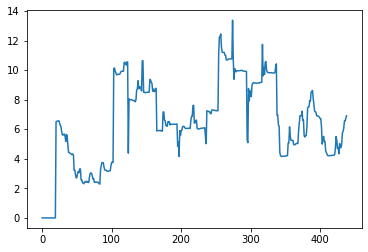

In [168]:
plt.plot(df)

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [170]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [171]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [172]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [173]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [174]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [175]:
X_test.shape

(31, 100, 1)

In [176]:
from google.colab import drive

In [23]:
drive.mount('/content/drive')


Mounted at /content/drive


In [177]:
filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakaBank/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakaBank/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakaBank/model3.h5"

In [ ]:
#filepath4 = "/content/drive/MyDrive/stock price CNN/modelsAci/model1.h5"

#filepath5 = "/content/drive/MyDrive/stock price_LSTM/modelsACI/model.h5"
#filepath6 = "/content/drive/MyDrive/stock_price_BILSTM/modelsACI/model.h5"



In [ ]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 39ms/step - loss: 0.2243 - val_loss: 0.0036
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0529 - val_loss: 0.0491
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0253 - val_loss: 0.0090
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0187 - val_loss: 0.0224
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0152 - val_loss: 0.0164
Epoch 6/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0107 - val_loss: 0.0122
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0090 - val_loss: 0.0183
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0090
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0055 - val_loss: 0.0151
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0048 - val_loss: 0.0140
Epoch 11/100
7/7 [=

In [ ]:
model1.save(filepath1)

In [ ]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 8s 349ms/step - loss: 0.2686 - val_loss: 0.2491
Epoch 2/100
7/7 [==============================] - 1s 159ms/step - loss: 0.0545 - val_loss: 0.0785
Epoch 3/100
7/7 [==============================] - 1s 154ms/step - loss: 0.0277 - val_loss: 0.1075
Epoch 4/100
7/7 [==============================] - 1s 154ms/step - loss: 0.0171 - val_loss: 0.1038
Epoch 5/100
7/7 [==============================] - 1s 154ms/step - loss: 0.0123 - val_loss: 0.0818
Epoch 6/100
7/7 [==============================] - 1s 162ms/step - loss: 0.0139 - val_loss: 0.0979
Epoch 7/100
7/7 [==============================] - 1s 162ms/step - loss: 0.0127 - val_loss: 0.0903
Epoch 8/100
7/7 [==============================] - 1s 156ms/step - loss: 0.0126 - val_loss: 0.0894
Epoch 9/100
7/7 [==============================] - 1s 159ms/step - loss: 0.0114 - val_loss: 0.0893
Epoch 10/100
7/7 [==============================] - 1s 163ms/step - loss: 0.0120 - val_loss: 0.0873
Epoch 11/

In [ ]:
model2.save(filepath2)

In [ ]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 15s 640ms/step - loss: 0.2630 - val_loss: 0.1168
Epoch 2/100
7/7 [==============================] - 2s 257ms/step - loss: 0.0398 - val_loss: 0.0059
Epoch 3/100
7/7 [==============================] - 2s 262ms/step - loss: 0.0240 - val_loss: 0.0568
Epoch 4/100
7/7 [==============================] - 2s 261ms/step - loss: 0.0168 - val_loss: 0.0071
Epoch 5/100
7/7 [==============================] - 2s 259ms/step - loss: 0.0114 - val_loss: 0.0236
Epoch 6/100
7/7 [==============================] - 2s 257ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 7/100
7/7 [==============================] - 2s 258ms/step - loss: 0.0085 - val_loss: 0.0136
Epoch 8/100
7/7 [==============================] - 2s 256ms/step - loss: 0.0069 - val_loss: 0.0129
Epoch 9/100
7/7 [==============================] - 2s 265ms/step - loss: 0.0074 - val_loss: 0.0133
Epoch 10/100
7/7 [==============================] - 2s 262ms/step - loss: 0.0065 - val_loss: 0.0125
Epoch 11

In [ ]:
model3.save(filepath3)

In [178]:
from keras.models import load_model

In [179]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsDhakaBank/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [180]:
print(len(all_models))

3


In [181]:

X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)
Y_test = Y_test.transpose()

In [182]:
model1 = load_model(filepath1)
model2 = load_model(filepath2)
model3 = load_model(filepath3)

In [183]:
predicted1 = model1.predict(X_test)
predicted2 = model2.predict(X_test)
predicted3 = model3.predict(X_test)

In [184]:
predicted1 = scaler.inverse_transform(predicted1)
predicted2 = scaler.inverse_transform(predicted2)
predicted3 = scaler.inverse_transform(predicted3)

In [185]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [186]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [187]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [188]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [189]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [190]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [191]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [192]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [193]:
stacked_model = define_stacked_model(all_models)

In [194]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [195]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [196]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.33992213, 0.37008446, 0.37454674],
       [0.34535635, 0.3682465 , 0.36940002],
       [0.3343136 , 0.35779455, 0.3626788 ],
       [0.33323288, 0.3506224 , 0.35537556],
       [0.32952398, 0.34341356, 0.34862372],
       [0.33001333, 0.3378646 , 0.34294242],
       [0.32643327, 0.33299473, 0.33881313],
       [0.31712458, 0.3283958 , 0.3360512 ],
       [0.32104114, 0.32738784, 0.33467916],
       [0.32989562, 0.32816303, 0.3342886 ],
       [0.33129725, 0.32807896, 0.33433   ],
       [0.3283394 , 0.32736608, 0.33439818],
       [0.3340765 , 0.32918116, 0.33571628],
       [0.34071666, 0.33150402, 0.3374194 ],
       [0.34127128, 0.3331925 , 0.33964878],
       [0.3452978 , 0.3362234 , 0.34271497],
       [0.34749204, 0.3419344 , 0.34923202],
       [0.35598207, 0.3544845 , 0.36220017],
       [0.3608825 , 0.36494184, 0.37300968],
       [0.37199897, 0.37195215, 0.37858695],
       [0.37538794, 0.37600347, 0.38264087],
       [0.39798367, 0.38538846, 0.3786408 ],
       [0.

In [197]:
yhat=scaler.inverse_transform(yhat)

In [198]:
x, y, z = yhat.T

In [199]:

x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [200]:
x = x.transpose()
y = y.transpose()
z = z.transpose()

In [201]:
RMSE = math.sqrt(mean_squared_error(x,Y_test))
RMSE

0.48060737431741163

In [202]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

0.44496073259109786

In [203]:
RMSE = math.sqrt(mean_squared_error(z,Y_test))
RMSE

0.4820617106630546

In [204]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(predicted1,Y_test)
print('MAE: %f' % mae)

MAE: 1.961745


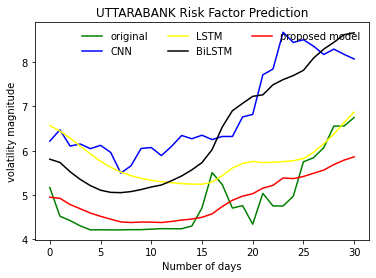

In [205]:

### Plotting 

plt.plot(Y_test,color ='green', label ='original')
plt.plot(predicted1,color ='blue', label ='CNN')
plt.plot(predicted2,color ='yellow', label ='LSTM')
plt.plot(predicted3,color ='black', label ='BiLSTM')
plt.plot(y,color ='red', label ='proposed model')


plt.xlabel('Number of days')
plt.ylabel('volatility magnitude')
plt.title('UTTARABANK Risk Factor Prediction')
plt.legend(loc='upper right',frameon=False,ncol=3)

plt.show(block=False)



In [206]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape

(1, 100)

In [207]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [208]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.65155464]
101
1 day input [0.46939476 0.46508239 0.33064757 0.31554556 0.31142385 0.31143423
 0.31143423 0.31272627 0.31236791 0.31274351 0.31244482 0.31275278
 0.31520767 0.314971   0.37868554 0.37870705 0.46062637 0.41516084
 0.39319655 0.39156389 0.39182234 0.39223981 0.37026831 0.37065393
 0.37035112 0.37450905 0.37683625 0.37710066 0.37629008 0.44014014
 0.47956168 0.51625221 0.51703151 0.51669583 0.53956476 0.49445231
 0.4958781  0.41719452 0.40917669 0.41538423 0.4168736  0.46112966
 0.55572431 0.56214907 0.56230355 0.59237323 0.59078332 0.63592415
 0.64031881 0.64471553 0.6044776  0.57544794 0.54010989 0.53696481
 0.5351887  0.5168587  0.51666936 0.51436681 0.51332907 0.50908814
 0.50235861 0.50158278 0.45756382 0.37334524 0.39898636 0.4123765
 0.3864597  0.3864597  0.33799657 0.33068152 0.32166857 0.31502429
 0.31501535 0.31496654 0.31487897 0.31532685 0.31532685 0.31619613
 0.31704009 0.31691474 0.31691474 0.32145788 0.35203741 0.41169048
 0.39144382 0.35172436 0.3559866  

In [209]:
len(lst_output)

10

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

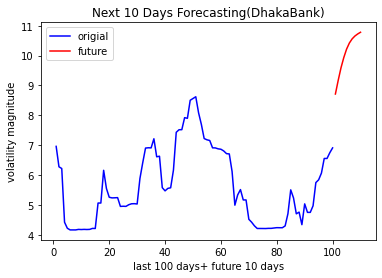

In [212]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting(DhakaBank)')
plt.legend(loc='best')
plt.show(block=False)

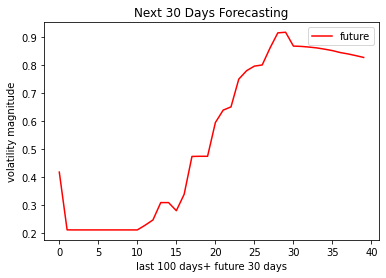

In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)